In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format
plt.style.use('seaborn-white')
# colorblind safe
plt.style.use('seaborn-colorblind')
plt.style.use('tableau-colorblind10')

# width and precision for f strings
width = 10
precision = 4

# default sizes for plots
# https://matplotlib.org/3.3.0/tutorials/introductory/customizing.html#customizing-with-matplotlibrc-files
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 16
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'medium'
plt.rcParams['lines.linewidth'] = 2

# other settings
pd.options.display.float_format = '{:,.4f}'.format
pd.set_option("display.precision", 3)
np.set_printoptions(precision=3, suppress=True)
%load_ext autoreload
%autoreload 2
pd.set_option('display.max_columns', None)
%config IPCompleter.greedy=True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
# setup dir
import sys, os
sys.path.insert(0, os.path.abspath('/Users/pault/Desktop/github/CampsitePredict/src'))

In [13]:
import helper_funcs as my_funcs

In [14]:
data = pd.read_json('../data/data.zip')

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from collections import Counter

In [19]:
data_nlp = data[['object_id', 'description']].copy()

In [20]:
data_nlp.head()

,object_id,description
0,527017,"<p><a href=""http://s432.photobucket.com/albums..."
1,786878,"<p>Join us for a quick, one-night, community-b..."
2,787337,"<h3><span class=""subcategory""><strong>Teacher ..."
3,885645,"<p style=""margin-bottom: 1.3em; padding-bottom..."
4,1114349,<p>Writers and filmmakers need to understand t...


In [21]:
data_nlp.set_index(data_nlp['object_id'], inplace=True)

In [22]:
data_nlp.drop('object_id', axis=1, inplace=True)

In [23]:
data_nlp.head()

,description
object_id,
527017,"<p><a href=""http://s432.photobucket.com/albums..."
786878,"<p>Join us for a quick, one-night, community-b..."
787337,"<h3><span class=""subcategory""><strong>Teacher ..."
885645,"<p style=""margin-bottom: 1.3em; padding-bottom..."
1114349,<p>Writers and filmmakers need to understand t...


In [ ]:
data_nlp.loc[:,'description'][0]

In [24]:
from bs4 import BeautifulSoup

In [25]:
descriptions = data_nlp['description']

In [26]:
descriptions.head()

object_id
527017     <p><a href="http://s432.photobucket.com/albums...
786878     <p>Join us for a quick, one-night, community-b...
787337     <h3><span class="subcategory"><strong>Teacher ...
885645     <p style="margin-bottom: 1.3em; padding-bottom...
1114349    <p>Writers and filmmakers need to understand t...
Name: description, dtype: object

In [ ]:
soup = BeautifulSoup(descriptions[0], 'html.parser')

In [ ]:
print(soup.prettify())

In [ ]:
from pprint import pprint
pprint(soup)

In [ ]:
#pd.read_html(descriptions[0])

In [ ]:
soup.get_text()

In [ ]:
#text = soup.find_all(text=True)

In [ ]:
text

In [31]:
test = descriptions.head()

In [32]:
# iterate through each row and parse html # maybe better way to do this without iterating?
for index, row in test.items(): 
    print(row)

<p><a href="http://s432.photobucket.com/albums/qq49/digusonline/?action=view&amp;current=supersunday.jpg" target="_blank"><img src="http://i432.photobucket.com/albums/qq49/digusonline/supersunday.jpg" border="0" alt="Photobucket" /></a></p>
<p> </p>
<p style="text-align: center;"><font size="3"><strong>Party Starz Entertaintment &amp; Diverse International Group Presents...<br /></strong></font><br /><font face="tahoma,arial,helvetica,sans-serif" size="4"><strong>The Official "99 Hour No Sleep" Super Bowl </strong></font></p>
<p style="text-align: center;"><font face="tahoma,arial,helvetica,sans-serif" size="4"><strong>Weekend </strong></font><font face="tahoma,arial,helvetica,sans-serif" size="4"><strong>Grand Finale</strong></font></p>
<p><br /><span style="font-family: Times New Roman,serif;"><font size="3"><font face="tahoma,arial,helvetica,sans-serif">No matter who wins or loses, this post-game party cannot be missed! Enjoy the drink specials and all night music!<strong> </strong>

In [33]:
desc_dict = {}
for index, row in test.items(): 
#     print(row)
    soup = BeautifulSoup(row, 'html.parser')
    text = soup.get_text()
    desc_dict[index] = text

In [34]:
desc_dict[527017]

'\n\xa0\nParty Starz Entertaintment & Diverse International Group Presents...The Official\xa0"99 Hour No Sleep" Super Bowl \nWeekend Grand Finale\nNo matter who wins or loses, this post-game party cannot be missed! Enjoy the drink specials and all night music!\xa0The ultimate "99 No Sleep"\xa0Super Bowl Weekend Grand Finale! Sunday, February 7th, 2010 @ Ink Nightclub-South Beach (717 Washington Ave, Miami Bch, FL 33139).\nHosted by 99 Jamz with special appearances by Fast Life Youngstaz. Special invited guests: Billy Blue, Dorrough and Brisco and with performances by various artist\'s and many many more at South Beach\xa0Miami\'s finest venue! This is a party you have to see to believe! This is everyone\'s last chance to make that impression, so don\'t\xa0half-step, bring your "A" game\xa0and party with\xa0all of the hottest artists, celebrities, models and superstar athletes that are guaranteed to be in the building!\nDJ Q & DJ Slym will ber keepig the party jumping til the sun comes 

In [ ]:
desc_dict

In [35]:
# do for full data
desc_dict = {}
for index, row in descriptions.items(): 
#     print(row)
    soup = BeautifulSoup(row, 'html.parser')
    text = soup.get_text()
    desc_dict[index] = text

In [36]:
len(desc_dict)

14337

In [37]:
X = pd.DataFrame.from_dict(desc_dict, orient='index')

In [38]:
X.head()

,0
527017,\n \nParty Starz Entertaintment & Diverse Inte...
786878,"Join us for a quick, one-night, community-buil..."
787337,Teacher Training on the Desired Results Develo...
885645,Affiliations are now due in respect of the 201...
1114349,Writers and filmmakers need to understand thei...


In [39]:
# recreate y with my descriptions
def convert(row):
    if row['acct_type'] == 'fraudster_event':
        val=True
    elif row['acct_type'] == 'fraudster':
        val=True
    elif row['acct_type'] == 'fraudster_att':
        val=True
    else:
        val=False
    return val
data['Fraud'] = data.apply(convert, axis=1)

In [44]:
type(X)

pandas.core.frame.DataFrame

In [43]:
data.shape

(14337, 45)

In [50]:
# concat to X
X['Fraud'] = data['Fraud'].values

In [51]:
X.head()

,0,Fraud
527017,\n \nParty Starz Entertaintment & Diverse Inte...,True
786878,"Join us for a quick, one-night, community-buil...",False
787337,Teacher Training on the Desired Results Develo...,False
885645,Affiliations are now due in respect of the 201...,False
1114349,Writers and filmmakers need to understand thei...,False


In [53]:
y = data['Fraud']

In [54]:
# test train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42, stratify=y)

In [55]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10752 entries, 2919695 to 5358184
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       10752 non-null  object
 1   Fraud   10752 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 178.5+ KB


In [56]:
# now do NLP
# actually do it on all...
tfidf = TfidfVectorizer(stop_words='english', max_features=10_000, max_df=0.9)
all_desc_tfidf_matrix = tfidf.fit_transform(X[0])
k = 30
clust_names = ['', '', '']
features = tfidf.get_feature_names()

In [57]:
def run_kmeans(X, df, features, k):
    '''
    accepts a TFIDF object (X), original df, features, and k (int)
    runs k means, gets top 20 cluster features, calcs % most common in each
    returns these as two dictionaries
    '''
    kmeans = KMeans(k)
    kmeans.fit(X)
    top_centroids = kmeans.cluster_centers_.argsort()[:, -1:-21:-1]
    cluster_feats = {}
    for num, centroid in enumerate(top_centroids):
        cluster_feats[num] = ', '.join(features[i] for i in centroid)
    # get the cluster assigned to each row (site
    assigned_cluster = kmeans.fit_transform(X).argmin(axis=1)
    
    return cluster_feats, kmeans

    # save in dict
#     cluster_cats = {}

#     for i in range(kmeans.n_clusters):
#         cluster = np.arange(0, X.shape[0])[assigned_cluster == i]
#         categories = df.iloc[cluster]['Category']
#         most_common = Counter(categories).most_common()
#         cluster_cats[i] = {}
#         for j in range(len(most_common)):
#             cluster_cats[i].update({most_common[j][0]: most_common[j][1]})
#     return cluster_cats, cluster_feats

In [58]:
cluster_feats, km = run_kmeans(all_desc_tfidf_matrix, data, features, k)

In [59]:
cluster_feats

{0: 'new, music, join, film, class, world, 2013, come, event, time, life, tour, live, learn, day, 2012, com, year, conference, art',
 1: 'com, www, http, facebook, https, event, dj, nyc, tickets, new, music, visit, party, youtube, twitter, org, eve, night, info, dance',
 2: 'salesforce, report, campaign, course, campaigns, training, workshop, use, available, create, instance, charities, summary, computer, refunds, able, staff, 299, excluding, 56',
 3: 'seed, pearl, club, business, marketing, people, networking, tanya, oyster, breakfast, want, vat, book, mini, believe, smarter, kick, fabulous, workshop, professionals',
 4: 'event, tickets, 00, ticket, 30, party, pm, night, 10, wine, available, join, door, dinner, free, food, time, com, come, saturday',
 5: 'sound, film, studio, seminar, introduction, post, complexities, brighton, filmmakers, twice, priced, studios, lovers, open, 12pm, 11am, delighted, chat, follows, 1pm',
 6: 'business, workshop, course, training, learn, class, new, soc

In [61]:
# pull description for only fraud cases
frauds = data[data['Fraud'] == True]

In [8]:
data.groupby('Fraud').agg('mean').round(2)

,approx_payout_date,body_length,channels,delivery_method,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,name_length,num_order,num_payouts,object_id,org_facebook,org_twitter,sale_duration,sale_duration2,show_map,user_age,user_created,user_type,venue_latitude,venue_longitude
Fraud,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,"1,351,254,483.0700","3,886.9900",6.3800,0.4800,"1,345,873,604.5300","1,350,822,491.6300","1,342,905,384.9700","1,350,544,896.4800",0.1400,"2,481.6800",0.0800,0.2100,0.8600,42.7800,30.3400,37.0400,"4,514,622.6200",8.6300,4.6900,49.8300,53.9500,0.8500,402.6800,"1,311,081,741.2200",2.8200,35.1700,-60.6900
True,"1,347,687,343.1600","1,508.8900",4.1500,0.0700,"1,345,333,444.0200","1,347,255,379.3500","1,318,542,205.9500","1,346,777,043.6200",0.0200,"1,911.2100",0.0000,0.0700,0.6500,29.9800,4.5300,0.5800,"4,700,036.1200",1.0400,0.2900,14.1300,16.5400,0.7600,87.1500,"1,337,804,461.4100",1.6200,35.9700,-43.4100


In [9]:
data.groupby('Fraud').agg('mean').round(2).to_markdown()

'| Fraud   |   approx_payout_date |   body_length |   channels |   delivery_method |   event_created |   event_end |   event_published |   event_start |   fb_published |     gts |   has_analytics |   has_header |   has_logo |   name_length |   num_order |   num_payouts |   object_id |   org_facebook |   org_twitter |   sale_duration |   sale_duration2 |   show_map |   user_age |   user_created |   user_type |   venue_latitude |   venue_longitude |\n|:--------|---------------------:|--------------:|-----------:|------------------:|----------------:|------------:|------------------:|--------------:|---------------:|--------:|----------------:|-------------:|-----------:|--------------:|------------:|--------------:|------------:|---------------:|--------------:|----------------:|-----------------:|-----------:|-----------:|---------------:|------------:|-----------------:|------------------:|\n| False   |          1.35125e+09 |       3886.99 |       6.38 |              0.48 |     1.34587

In [127]:
not_frauds = data[data['Fraud'] == False]

In [128]:
not_frauds.describe()

,approx_payout_date,body_length,channels,delivery_method,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,name_length,num_order,num_payouts,object_id,org_facebook,org_twitter,sale_duration,sale_duration2,show_map,user_age,user_created,user_type,venue_latitude,venue_longitude
count,"13,044.0000","13,044.0000","13,044.0000","13,040.0000","13,044.0000","13,044.0000","13,039.0000","13,044.0000","13,044.0000","13,044.0000","13,044.0000","8,409.0000","13,044.0000","13,044.0000","13,044.0000","13,044.0000","13,044.0000","13,040.0000","13,040.0000","13,007.0000","13,044.0000","13,044.0000","13,044.0000","13,044.0000","13,044.0000","12,338.0000","12,338.0000"
mean,"1,351,254,483.0727","3,886.9946",6.3776,0.4755,"1,345,873,604.5285","1,350,822,491.6283","1,342,905,384.9734","1,350,544,896.4811",0.1378,"2,481.6796",0.0800,0.2103,0.8615,42.7846,30.3382,37.0414,"4,514,622.6189",8.6332,4.6880,49.8276,53.9502,0.8529,402.6831,"1,311,081,741.2213",2.8193,35.1658,-60.6931
std,"23,425,148.5558","5,889.3185",3.7689,0.5999,"23,531,803.2216","23,425,144.7723","70,606,429.5994","23,451,327.6057",0.3447,"9,471.3123",0.2712,0.4075,0.3454,22.5672,99.0070,130.7762,"1,959,377.3010",11.9836,6.1264,53.3786,58.6919,0.3542,417.5086,"40,539,046.3767",1.6143,20.4019,66.9928
min,"1,283,225,400.0000",0.0000,0.0000,0.0000,"1,256,225,769.0000","1,282,793,400.0000",0.0000,"1,273,089,600.0000",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,"379,603.0000",0.0000,0.0000,-143.0000,-86.0000,0.0000,0.0000,"1,011,210,442.0000",1.0000,-45.0452,-159.3902
25%,"1,334,875,950.0000",904.0000,5.0000,0.0000,"1,329,426,933.7500","1,334,443,950.0000","1,329,583,021.5000","1,334,061,900.0000",0.0000,124.5100,0.0000,0.0000,1.0000,27.0000,3.0000,0.0000,"2,877,048.5000",0.0000,0.0000,19.0000,20.0000,1.0000,37.0000,"1,284,578,098.7500",3.0000,34.0397,-97.7140
50%,"1,356,140,700.0000","2,164.0000",6.0000,0.0000,"1,351,139,989.5000","1,355,708,700.0000","1,351,365,893.0000","1,355,510,700.0000",0.0000,438.6750,0.0000,0.0000,1.0000,39.0000,9.0000,3.0000,"4,589,996.0000",0.0000,0.0000,35.0000,37.0000,1.0000,293.0000,"1,313,805,994.0000",3.0000,39.9819,-79.7493
75%,"1,370,595,600.0000","4,567.2500",8.0000,1.0000,"1,365,123,186.7500","1,370,163,600.0000","1,365,444,075.0000","1,370,047,050.0000",0.0000,"1,540.8900",0.0000,0.0000,1.0000,54.0000,25.0000,16.0000,"6,035,103.5000",15.0000,11.0000,62.0000,67.0000,1.0000,640.0000,"1,343,315,642.0000",3.0000,44.6423,-6.2552
max,"1,419,292,800.0000","65,535.0000",13.0000,3.0000,"1,381,171,266.0000","1,418,860,800.0000","1,381,171,529.0000","1,418,850,000.0000",1.0000,"306,293.9300",1.0000,1.0000,1.0000,254.0000,"2,000.0000","1,858.0000","8,671,713.0000",91.0000,34.0000,848.0000,848.0000,1.0000,"3,794.0000","1,380,115,338.0000",103.0000,64.8440,176.1695


In [126]:
frauds.describe()

,approx_payout_date,body_length,channels,delivery_method,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,name_length,num_order,num_payouts,object_id,org_facebook,org_twitter,sale_duration,sale_duration2,show_map,user_age,user_created,user_type,venue_latitude,venue_longitude
count,"1,293.0000","1,293.0000","1,293.0000","1,281.0000","1,293.0000","1,293.0000","1,199.0000","1,293.0000","1,293.0000","1,293.0000","1,293.0000",519.0000,"1,293.0000","1,293.0000","1,293.0000","1,293.0000","1,293.0000","1,238.0000","1,238.0000","1,175.0000","1,293.0000","1,293.0000","1,293.0000","1,293.0000","1,293.0000",923.0000,923.0000
mean,"1,347,687,343.1555","1,508.8863",4.1493,0.0734,"1,345,333,444.0201","1,347,255,379.3503","1,318,542,205.9541","1,346,777,043.6195",0.0224,"1,911.2144",0.0031,0.0694,0.6458,29.9753,4.5305,0.5824,"4,700,036.1206",1.0355,0.2940,14.1260,16.5445,0.7564,87.1524,"1,337,804,461.4145",1.6195,35.9699,-43.4136
std,"29,103,378.1765","3,550.2999",4.1752,0.3176,"28,683,362.1881","29,103,326.5778","190,250,636.5322","28,633,788.7280",0.1481,"4,639.7862",0.0556,0.2543,0.4785,25.6918,9.6280,2.9022,"2,247,116.5208",5.4799,1.9548,59.7704,58.8958,0.4294,306.3712,"43,465,698.5582",1.0134,17.3958,58.3168
min,"1,171,256,400.0000",0.0000,0.0000,0.0000,"1,170,332,468.0000","1,170,824,400.0000",0.0000,"1,170,819,000.0000",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,"47,146.0000",0.0000,0.0000,"-1,094.0000","-1,094.0000",0.0000,0.0000,"1,146,260,369.0000",1.0000,-39.8808,-155.9648
25%,"1,331,593,200.0000",0.0000,0.0000,0.0000,"1,330,696,238.0000","1,331,164,800.0000","1,329,189,642.0000","1,331,100,000.0000",0.0000,2.6600,0.0000,0.0000,0.0000,14.0000,1.0000,0.0000,"3,051,127.0000",0.0000,0.0000,1.0000,1.0000,1.0000,0.0000,"1,324,251,348.0000",1.0000,30.2160,-83.0796
50%,"1,351,933,200.0000",452.0000,5.0000,0.0000,"1,349,842,667.0000","1,351,501,200.0000","1,348,685,689.0000","1,351,350,000.0000",0.0000,341.2800,0.0000,0.0000,1.0000,25.0000,2.0000,0.0000,"4,539,872.0000",0.0000,0.0000,3.0000,4.0000,1.0000,0.0000,"1,348,610,239.0000",1.0000,39.7684,-73.9837
75%,"1,371,942,000.0000","1,669.0000",6.0000,0.0000,"1,369,217,802.0000","1,371,510,000.0000","1,367,937,892.0000","1,370,592,000.0000",0.0000,"1,643.8500",0.0000,0.0000,1.0000,38.0000,5.0000,0.0000,"6,775,341.0000",0.0000,0.0000,10.0000,18.0000,1.0000,19.0000,"1,367,355,898.0000",3.0000,51.4822,-0.1262
max,"1,523,487,600.0000","54,648.0000",13.0000,3.0000,"1,382,011,776.0000","1,523,055,600.0000","1,381,608,321.0000","1,387,832,400.0000",1.0000,"61,242.6800",1.0000,1.0000,1.0000,253.0000,140.0000,29.0000,"8,792,893.0000",76.0000,16.0000,980.0000,980.0000,1.0000,"2,207.0000","1,381,542,918.0000",5.0000,61.2188,153.5757


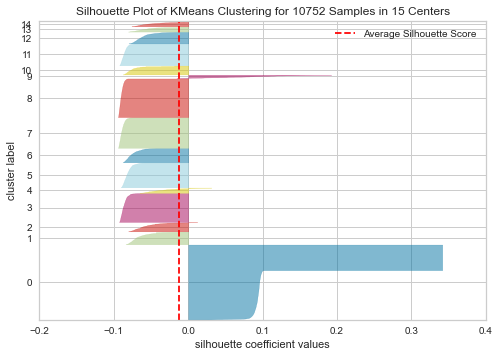

/usr/local/anaconda3/envs/py377/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7ff040eef850>,
                     colors='yellowbrick', model=None)

In [112]:
from yellowbrick.cluster import silhouette_visualizer
# Use the quick method and immediately show the figure
silhouette_visualizer(km, all_desc_tfidf_matrix, colors='yellowbrick')

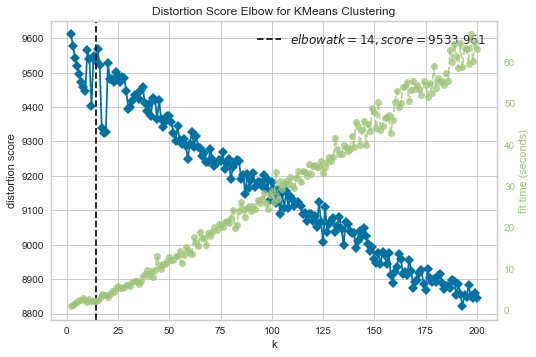

/usr/local/anaconda3/envs/py377/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0b9104e90>,
                 k=None, model=None)

In [120]:
from yellowbrick.cluster.elbow import kelbow_visualizer
kelbow_visualizer(km, all_desc_tfidf_matrix, y=None, k=200, metric='distortion', timings=True, locate_elbow=True, show=True)

In [62]:
frauds_desc = X[X['Fraud'] == True]

In [63]:
frauds_desc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1293 entries, 527017 to 5492990
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1293 non-null   object
 1   Fraud   1293 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 21.5+ KB


In [69]:
# do NLP on just fraud descriptions
tfidf = TfidfVectorizer(stop_words='english', max_features=10_000, max_df=0.9)
all_desc_tfidf_matrix = tfidf.fit_transform(frauds_desc[0])
k = 5
clust_names = ['', '', '']
features = tfidf.get_feature_names()
cluster_feats, km = run_kmeans(all_desc_tfidf_matrix, X, features, k)
cluster_feats

{0: 'et, 213, dial, 0400, 226, 465905, les, le, scheduled, la, 30pm, number, code, today, conference, du, live, des, pour, en',
 1: 'braco, dec, earthtransformation, igniting, earth, inner, spark, 5th, transformation, seminars, 29, feb, 2010, additional, featuring, session, 2011, http, 28, annual',
 2: 'course, new, training, business, people, seminar, free, help, world, marketing, music, live, come, learn, day, work, bar, time, club, information',
 3: 'event, tickets, ticket, wine, time, 10, available, class, workshop, bring, help, night, food, limited, vip, minutes, emailed, 00, taste, fun',
 4: 'party, dj, come, night, dance, tickets, best, club, vip, bottle, event, 10pm, dress, birthday, special, cheerful, hope, music, free, champagne'}

In [70]:
tfidf = TfidfVectorizer(stop_words='english', max_features=10_000, max_df=0.9)
all_desc_tfidf_matrix = tfidf.fit_transform(frauds_desc[0])
k = 2
clust_names = ['', '', '']
features = tfidf.get_feature_names()
cluster_feats, km = run_kmeans(all_desc_tfidf_matrix, X, features, k)
cluster_feats

{0: 'braco, dec, earthtransformation, igniting, earth, inner, spark, 5th, transformation, seminars, 29, feb, 2010, additional, featuring, session, 2011, http, 28, annual',
 1: 'event, party, tickets, come, live, night, new, et, ticket, time, help, free, dj, music, club, course, today, conference, la, people'}

In [71]:
tfidf = TfidfVectorizer(stop_words='english', max_features=10_000, max_df=0.9)
all_desc_tfidf_matrix = tfidf.fit_transform(frauds_desc[0])
k = 20
clust_names = ['', '', '']
features = tfidf.get_feature_names()
cluster_feats, km = run_kmeans(all_desc_tfidf_matrix, data, features, k)
cluster_feats

{0: 'trainings, conference, researching, doen, nitty, gritty, people, prolific, 6yrs, cheap, improves, absolutely, everyday, incredible, technology, research, say, immediately, field, grow',
 1: 'braco, dec, earthtransformation, igniting, earth, inner, spark, 5th, transformation, seminars, 29, feb, 2010, additional, featuring, session, 2011, http, 28, annual',
 2: 'event, party, tickets, come, night, time, ticket, dj, music, new, course, live, la, help, join, people, best, class, day, dance',
 3: 'justin, bieber, tour, dates, usher, years, eventful, likes, talent, singing, songs, videos, latest, share, young, concerning, cyrus, timberlake, corners, starred',
 4: 'dial, 213, 226, 0400, 465905, scheduled, 30pm, number, et, today, code, conference, live, entertainments, enrichment, ensemble, enrollments, enrollment, enroll, enthusiasts',
 5: 'sign, leg, positioned, ups, placed, 30th, travel, december, 1st, power, 9pm, friday, company, class, et, vip, club, time, entertainments, enroll',
 

In [80]:
# test if can assign each row a cluster id
def run_kmeans_assign_clust(X, df, features, k):
    '''
    accepts a TFIDF object (X), original df, features, and k (int)
    runs k means, gets top 20 cluster features, calcs % most common in each
    returns these as two dictionaries
    '''
    kmeans = KMeans(k)
    kmeans.fit(X)
    top_centroids = kmeans.cluster_centers_.argsort()[:, -1:-21:-1]
    cluster_feats = {}
    for num, centroid in enumerate(top_centroids):
        cluster_feats[num] = ', '.join(features[i] for i in centroid)
    # get the cluster assigned to each row (site
    assigned_cluster = kmeans.fit_transform(X).argmin(axis=1)
    
#     return cluster_feats, kmeans

    # save in dict
    cluster_cats = {}

    for i in range(kmeans.n_clusters):
        cluster = np.arange(0, X.shape[0])[assigned_cluster == i]
        categories = df.iloc[cluster]['Fraud']
        most_common = Counter(categories).most_common()
#         print(cluster)
        cluster_cats[i] = {}
        for j in range(len(most_common)):
            cluster_cats[i].update({most_common[j][0]: most_common[j][1]})
    return cluster_cats, cluster_feats

In [92]:
tfidf = TfidfVectorizer(stop_words='english', max_features=10_000, max_df=0.9)
all_desc_tfidf_matrix = tfidf.fit_transform(X[0])
k = 2
features = tfidf.get_feature_names()

In [93]:
cluster_cats, cluster_feats = run_kmeans_assign_clust(all_desc_tfidf_matrix, X, features, k)

In [94]:
cluster_cats

{0: {False: 8703, True: 1114}, 1: {False: 4341, True: 179}}

In [95]:
cluster_cats, cluster_feats = run_kmeans_assign_clust(all_desc_tfidf_matrix, X, features, 5)
cluster_cats

{0: {False: 143, True: 41},
 1: {False: 4872, True: 808},
 2: {False: 1234, True: 32},
 3: {False: 3469, True: 278},
 4: {False: 3326, True: 134}}

In [96]:
X.head()

,0,Fraud
527017,\n \nParty Starz Entertaintment & Diverse Inte...,True
786878,"Join us for a quick, one-night, community-buil...",False
787337,Teacher Training on the Desired Results Develo...,False
885645,Affiliations are now due in respect of the 201...,False
1114349,Writers and filmmakers need to understand thei...,False


In [107]:
kmeans = KMeans(10)
tfidf = TfidfVectorizer(stop_words='english', max_features=10_000, max_df=0.9)
all_desc_tfidf_matrix = tfidf.fit_transform(X[0])
kmeans.fit(all_desc_tfidf_matrix)

assigned_cluster = kmeans.transform(all_desc_tfidf_matrix).argmin(axis=1)
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, all_desc_tfidf_matrix.shape[0])[assigned_cluster==i]
    sample_articles = np.random.choice(cluster, 1, replace=False)
    print(f"cluster {i}:")
    for article in sample_articles:
        print(f"    {X.loc[article][0]}")

cluster 0:


KeyError: 6218

In [ ]:
# or do NMF?